# **Titanic - Predicting survivors with Machine learning**

## Description and deliverables

# **PACE stages**

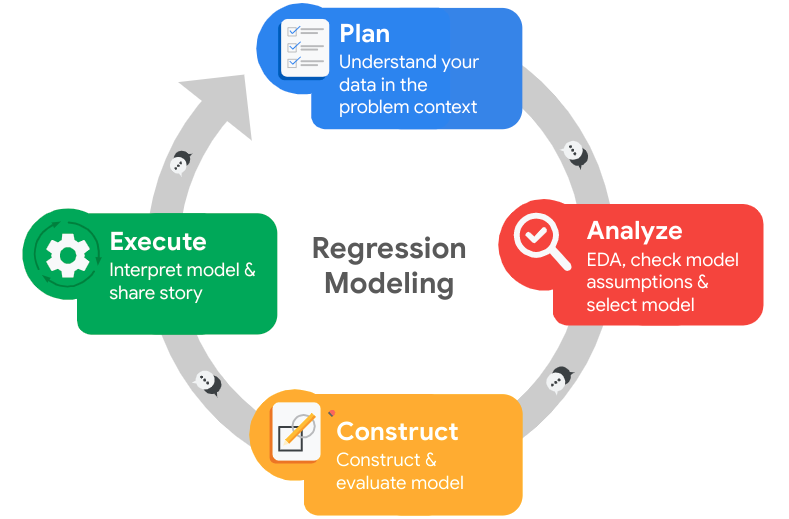

## Pace: Plan Stage

### The business scenario and problem
This project is related to a Kaggle Machine Learning competition, the objective is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. Then answer the following question: *What sorts of people were more likely to survive the Titanic sinking?"*

`Background of the historical event:` On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

"Train.csv" will contain the details of a subset of the passengers on board (891 to be exact) and more importantly, will reveal whether they survived or not, also known as the “ground truth”.

The "test.csv" dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s my current task to predict these outcomes.

Using the patterns I find in the "train.csv" data, I have to predict whether the other 418 passengers on board (found in "test.csv") survived.

For each in the test set, I must predict a 0 or 1 value for the variable.

### Titanic dataset
**Note:** This data was recovered from the data science platform Kaggle.com, ref. [Kaggle](https://www.kaggle.com/competitions/titanic/data).

Variable  |Description |
-----|-----|
PassengerId|Passengers ID|
survival|Survival [0 = No, 1 = Yes]|
pclass|Ticket class [1 = 1st, 2 = 2nd, 3 = 3rd]|
Name|Passengers name|
sex|Sex|
age|Age in years|
sibsp|# of siblings / spouses aboard the Titanic	
parch|# of parents / children aboard the Titanic	
ticket|Ticket number
fare|Passenger fare
cabin|Cabin number
embarked|Port of Embarkation [C = Cherbourg, Q = Queenstown, S = Southampton] 

Variable Notes
- **pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- **sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
- **parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children traveled only with a nanny, therefore parch=0 for them.

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [121]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and color pqlette.
sns.set(style='whitegrid', palette='Paired')

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [122]:
# Load 'train' dataset into a dataframe
df0_train = pd.read_csv(r"C:\Users\spectre\Downloads\Titanic predictive model project\titanic dataset\train.csv")

# Load 'test' dataset into a dataframe
df0_test = pd.read_csv(r"C:\Users\spectre\Downloads\Titanic predictive model project\titanic dataset\test.csv")

# Create a copy of the 'train' dataframe
df1_train = df0_train.copy()

# Create a copy of the 'test' dataframe
df1_test = df0_test.copy()

# Concatenate 'df1_train' and 'df1_test' dataframes
df1 = pd.concat([df1_train, df1_test], axis= 0, sort= False)

# Display the first five rows of the train dataframe
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)

#### Exploring the training set

In [123]:
# Gather basic information about the train dataframe
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
# Gather descriptive statistics about the train dataframe
df1_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Rename columns

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [125]:
# Display all column names from the train dataframe
df1_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
# Rename columns for easier readability in the train dataframe
df2_train = df1_train.rename(columns={'PassengerId': 'passenger_id', 'Survived': 'survived', 'Pclass':'t_class','Name': 'name', 'Sex': 'sex', 'Age' : 'age', 'SibSp': 'sib_sp', 'Parch': 'par_ch', 'Ticket': 'ticket', 'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'})

# Display all column names after the update
df2_train.columns

Index(['passenger_id', 'survived', 't_class', 'name', 'sex', 'age', 'sib_sp',
       'par_ch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [127]:
# Round up the 'fare' column values to two decimal places in the train dataframe
df2_train['fare'] = df2_train['fare'].round(2)

# Display the first five rows of the updated dataframe
df2_train.head()

,passenger_id,survived,t_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Check missing values

In [128]:
# Check for missing values in the train dataframe
df2_train.isnull().sum()

passenger_id      0
survived          0
t_class           0
name              0
sex               0
age             177
sib_sp            0
par_ch            0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

`Note` : I notice 687 missing values in the `cabin` column, 177 missing values in the `age` column, and 2 missing values in the `embarked` column, I will deal with the missing values as follows:

I drop the `cabin` column because it does not seem to be useful for the analysis and will not be a critical feature for predicting passenger survival.

In [129]:
# Drop the 'cabin' column in the train dataframe
df2_train = df2_train.drop(['cabin'], axis= 1)

The `age` column is an important feature for predicting passenger survival, so I will keep it. I will fill in the missing values with the median age.

In [130]:
# Impute the missing values in the `age` column with the median age in the train dataframe
df2_train['age'] = df2_train['age'].fillna(df2_train['age'].median())

The `embarked` column is only missing 2 values, I will not edit that column and will keep it as it is.

Check the missing values again to confirm that there are no more missing values.

In [131]:
# Check for missing values in the train dataframe
df2_train.isnull().sum()

passenger_id    0
survived        0
t_class         0
name            0
sex             0
age             0
sib_sp          0
par_ch          0
ticket          0
fare            0
embarked        2
dtype: int64

I also do not see a need for the `ticket` and `name` columns, so I will drop them.

In [132]:
# Drop 'ticket' and 'name' columns in the train dataframe
df2_train = df2_train.drop(['ticket', 'name'], axis= 1)

# Display the first five rows of the updated dataframe
df2_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked
0,1,0,3,male,22.0,1,0,7.25,S
1,2,1,1,female,38.0,1,0,71.28,C
2,3,1,3,female,26.0,0,0,7.92,S
3,4,1,1,female,35.0,1,0,53.10,S
4,5,0,3,male,35.0,0,0,8.05,S


### Check duplicates

In [133]:
# Check for duplicates in the train dataframe
df2_train.duplicated().sum()

0

### Check outliers

Check numerical data for outliers using the IQR rule.

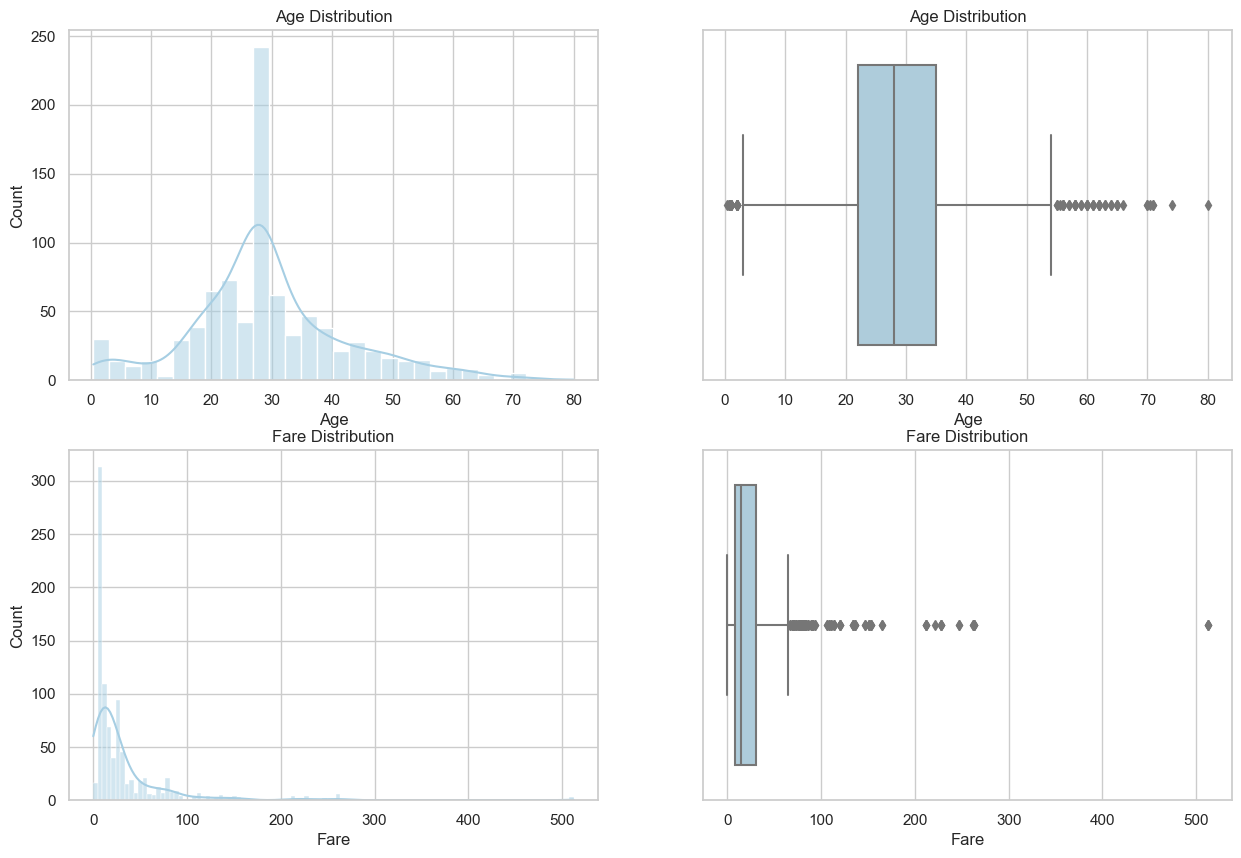

In [134]:
# Create fig and ax objects for plotting (train dataframe) for the numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot a histogram of the 'age' column
sns.histplot(data=df2_train, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot a boxplot of the 'age' column
sns.boxplot(data=df2_train, x='age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# Plot a histogram of the 'fare' column
sns.histplot(data=df2_train, x='fare', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution')
axes[1, 0].set_xlabel('Fare')
axes[1, 0].set_ylabel('Count')

# Plot a boxplot of the 'fare' column
sns.boxplot(data=df2_train, x='fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')

# Display the plots
plt.show()

In [135]:
# Compute the median age in the train dataframe
age_median = df2_train['age'].median()
print('Median age: ', age_median)

# Compute the median fare in the train dataframe
fare_median = df2_train['fare'].median()
print('Median fare: ', fare_median)

Median age:  28.0
Median fare:  14.45


`Observations`
* The age of passengers is mostly between 20 and 40 years old, with a median of 28 years old.
* The 75th quartile for the fare is 31 dollars, but the maximum fare is 512 dollars. Clearly indicating outliers in the fare data.

In [136]:
# Determine the number of rows containing outliers for the 'age' column in the train dataframe

# Compute the 25th percentile of `age`
q25 = df2_train['age'].quantile(0.25)

# Compute the 75th percentile of `age`
q75 = df2_train['age'].quantile(0.75)

# Compute the interquartile range (IQR) of `age`
iqr = q75 - q25

# Define the upper and lower bounds for outliers
upper_bound = q75 + 1.5 * iqr
lower_bound = q25 - 1.5 * iqr
print('The upper bound for outliers is', upper_bound)
print('The lower bound for outliers is', lower_bound)

# Identify subset of rows containing outliers in `age`
outliers = df2_train[(df2_train['age'] < lower_bound) | (df2_train['age'] > upper_bound)]

# Count the number of rows containing outliers for 'age' in the train dataframe
print('The number of rows containing outliers for the age column is', outliers['age'].shape[0])

The upper bound for outliers is 54.5
The lower bound for outliers is 2.5
The number of rows containing outliers for the age column is 66


In [137]:
# Determine the number of rows containing of outliers for the 'fare' column in the train dataframe

# Compute the 25th percentile of `fare`
q25 = df2_train['fare'].quantile(0.25)

# Compute the 75th percentile of `fare`
q75 = df2_train['fare'].quantile(0.75)

# Compute the interquartile range (IQR) of `fare`
iqr = q75 - q25

# Define the upper and lower bounds for outliers
upper_bound = q75 + 1.5 * iqr
lower_bound = q25 - 1.5 * iqr
print('The upper bound for outliers is', upper_bound)
print('The lower bound for outliers is', lower_bound)

# Identify subset of rows containing outliers in `fare`
outliers = df2_train[(df2_train['fare'] < lower_bound) | (df2_train['fare'] > upper_bound)]

# Count the number of rows containing outliers for 'fare' in the train dataframe
print('The number of rows containing outliers for the fare column is', outliers['fare'].shape[0])

The upper bound for outliers is 65.63499999999999
The lower bound for outliers is -26.724999999999998
The number of rows containing outliers for the fare column is 116


`Note` : Certain types of models are more sensitive to outliers than others. But in my case, I will not remove the outliers because I the random forest model that I am planning to use is not sensitive to outliers.

Exploring the data for outliers.

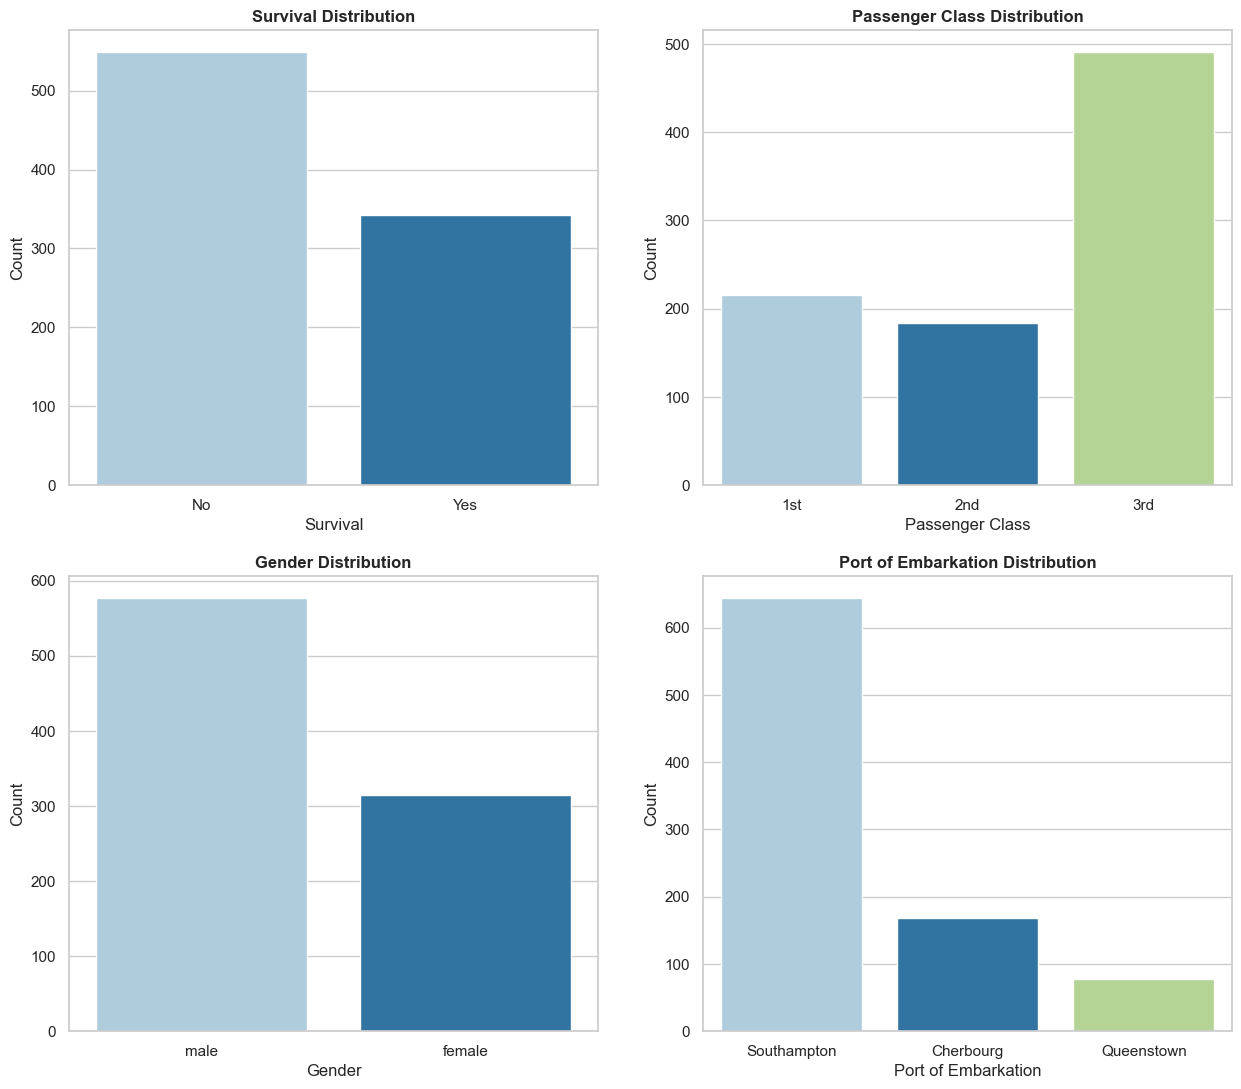

In [138]:
# Create fig and ax objects for plotting (train dataframe) 
fig, axes = plt.subplots(2, 2, figsize=(15, 13))

# Create a count plot of the 'survived' column
sns.countplot(data=df2_train, x='survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Survival')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No', 'Yes'])

# Create a count plot of the 't_class' column
sns.countplot(data=df2_train, x='t_class', ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['1st', '2nd', '3rd'])

# Create a count plot of the 'sex' column
sns.countplot(data=df2_train, x='sex', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Create a count plot of the 'Embarked' column
sns.countplot(data=df2_train, x='embarked', ax=axes[1, 1])
axes[1, 1].set_title('Port of Embarkation Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Port of Embarkation')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Display the plots
plt.show()

In [139]:
# Compute the survival rate for the train dataframe
survival_rate = df2_train['survived'].mean()
print('Survival rate: ', survival_rate)

Survival rate:  0.3838383838383838


`Note` : I have a slight class imbalance for the target variable `survived`, but it is not severe enough to warrant any special treatment, it is not typically a major concern for many machine learning algorithms, including Random Forest and XGBoost, I just need to make sure to evaluate my model using the appropriate metrics (On top of accuracy, adding precision, recall, F1-score, and ROC-AUC, as they provide a more comprehensive view of model performance, especially when class distribution is skewed).

In [140]:
# Compute the 'sex' percentage for the train dataframe
sex_percentage = df2_train['sex'].value_counts(normalize=True) * 100
print('Gender percentages: ', sex_percentage)

Gender percentages:  sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


In [141]:
# Compute the 't_class' percentage for the train dataframe
class_percentage = df2_train['t_class'].value_counts(normalize=True) * 100
print('Passenger class percentages: ', class_percentage)

Passenger class percentages:  t_class
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


In [142]:
# Compute the 'embarked' percentage for the train dataframe
embarked_percentage = df2_train['embarked'].value_counts(normalize=True) * 100
print('Port of embarkation percentages: ', embarked_percentage)

Port of embarkation percentages:  embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


`Observations`
* The survival rate of passengers is 38.38%.
* Male passengers represents the majority in the ship with a percentage of 64.76%.
* The most common ticket class is 3rd class (55.11%). 
* The most common port of embarkation is Southampton (72.44%).

Check the family organization of passengers:

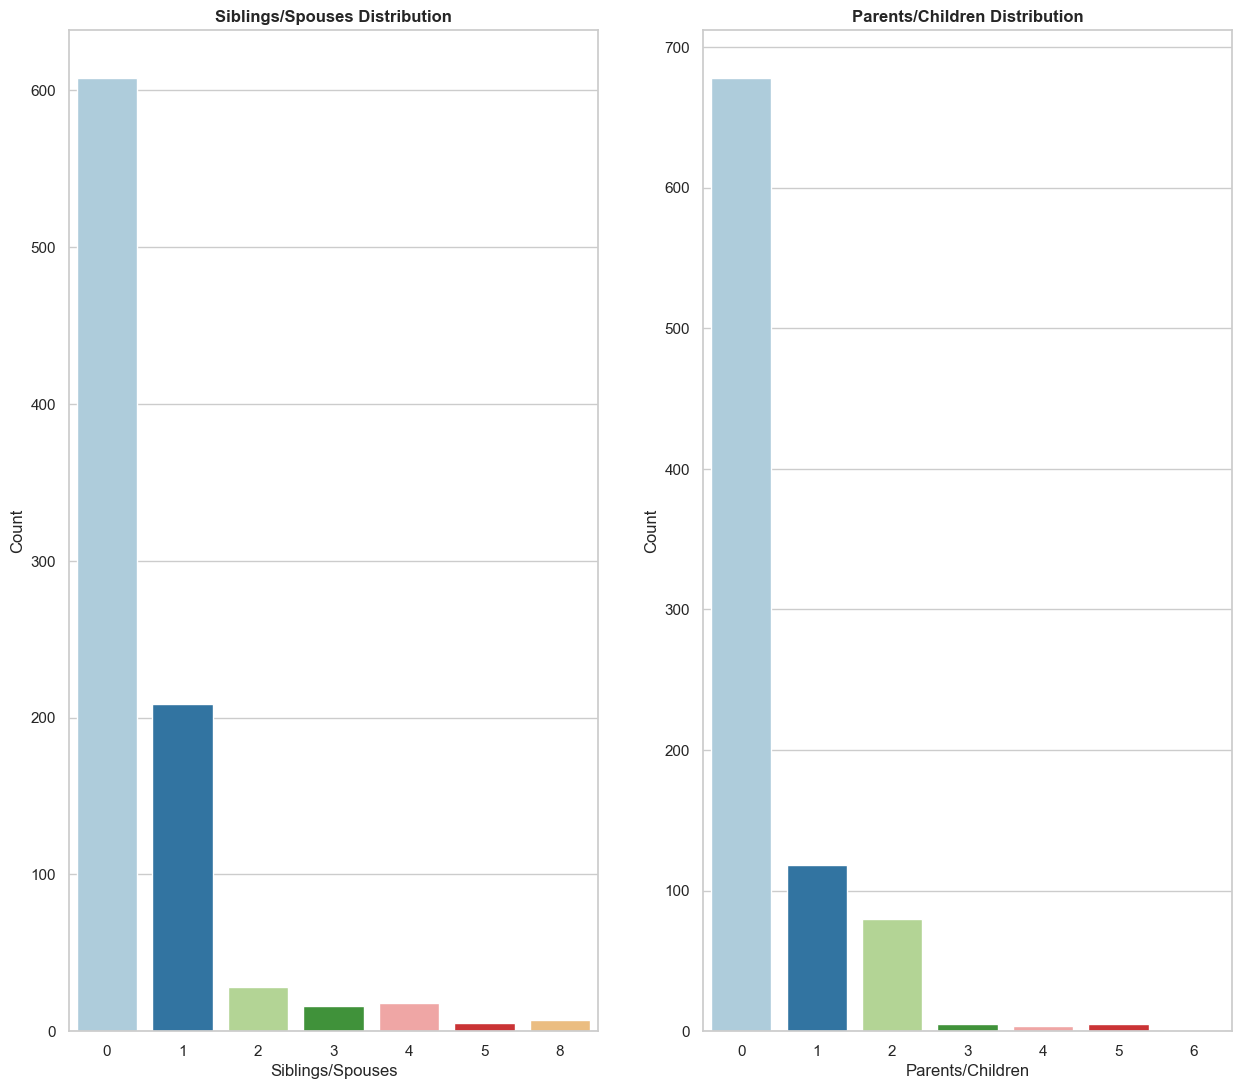

In [143]:
# Create fig and ax objects to plot 'siblings/spouses' and 'parents/children' columns (train dataframe)
fig, axes = plt.subplots(1, 2, figsize=(15, 13))

# Create a count plot of the 'sib_sp' column
sns.countplot(data=df2_train, x='sib_sp', ax=axes[0])
axes[0].set_title('Siblings/Spouses Distribution', fontweight='bold')
axes[0].set_xlabel('Siblings/Spouses')
axes[0].set_ylabel('Count')

# Create a count plot of the 'par_ch' column
sns.countplot(data=df2_train, x='par_ch', ax=axes[1])
axes[1].set_title('Parents/Children Distribution', fontweight='bold')
axes[1].set_xlabel('Parents/Children')
axes[1].set_ylabel('Count')

# Display the plots
plt.show()

`Observations`
* The parents-children ratio is 0.39. It means 39% of passengers were traveling with their parents or children.
* The siblings-spouses ratio is 0.52. It means 52% of passengers were traveling with their siblings or spouses.

#### Exploring the test set

I have to make sure that the test set has the same structure as the training set for the sake of preprocessing consistency.

In [144]:
# Gather basic information about the test dataframe
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [145]:
# Gather descriptive statistics about the test dataframe
df1_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


`Observations`:
* The difference in the number of rows between the training set and the test set is 418 rows.
* The test set does not have the `survived` column, which is the target variable that I am trying to predict.
* The test set has the same columns as the training set (before I rename them)
* The descriptive statistics of the test set are similar to the training set.

In [146]:
# Display all column names from the test dataframe
df1_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [147]:
# Rename columns for easier readability in the test dataframe
df1_test = df1_test.rename(columns={'PassengerId': 'passenger_id', 'Pclass':'t_class','Name': 'name', 'Sex': 'sex', 'Age' : 'age', 'SibSp': 'sib_sp', 'Parch': 'par_ch', 'Ticket': 'ticket', 'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'})

# Display all column names after the update
df1_test.columns

Index(['passenger_id', 't_class', 'name', 'sex', 'age', 'sib_sp', 'par_ch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [148]:
# Round up the 'fare' column values to two decimal places in the test dataframe
df1_test['fare'] = df1_test['fare'].round(2)

In [149]:
# Check for missing values in the test dataframe
df1_test.isnull().sum()

passenger_id      0
t_class           0
name              0
sex               0
age              86
sib_sp            0
par_ch            0
ticket            0
fare              1
cabin           327
embarked          0
dtype: int64

In [150]:
# Drop the 'cabin' column in the test dataframe
df1_test = df1_test.drop(['cabin'], axis= 1)

# Impute the missing values in the `age` column with the median age in the test dataframe
df1_test['age'] = df1_test['age'].fillna(df1_test['age'].median())

# Impute the missing values in the `fare` column with the median fare in the test dataframe
df1_test['fare'] = df1_test['fare'].fillna(df1_test['fare'].median())

# Check for missing values in the test dataframe
df1_test.isnull().sum()

passenger_id    0
t_class         0
name            0
sex             0
age             0
sib_sp          0
par_ch          0
ticket          0
fare            0
embarked        0
dtype: int64

In [151]:
# Drop 'ticket' and 'name' columns in the test dataframe
df1_test = df1_test.drop(['ticket', 'name'], axis= 1)

# Display the first five rows of the updated dataframe
df1_test.head()

,passenger_id,t_class,sex,age,sib_sp,par_ch,fare,embarked
0,892,3,male,34.5,0,0,7.83,Q
1,893,3,female,47.0,1,0,7.00,S
2,894,2,male,62.0,0,0,9.69,Q
3,895,3,male,27.0,0,0,8.66,S
4,896,3,female,22.0,1,1,12.29,S


In [152]:
# Check for duplicates in the test dataframe
df1_test.duplicated().sum()

0

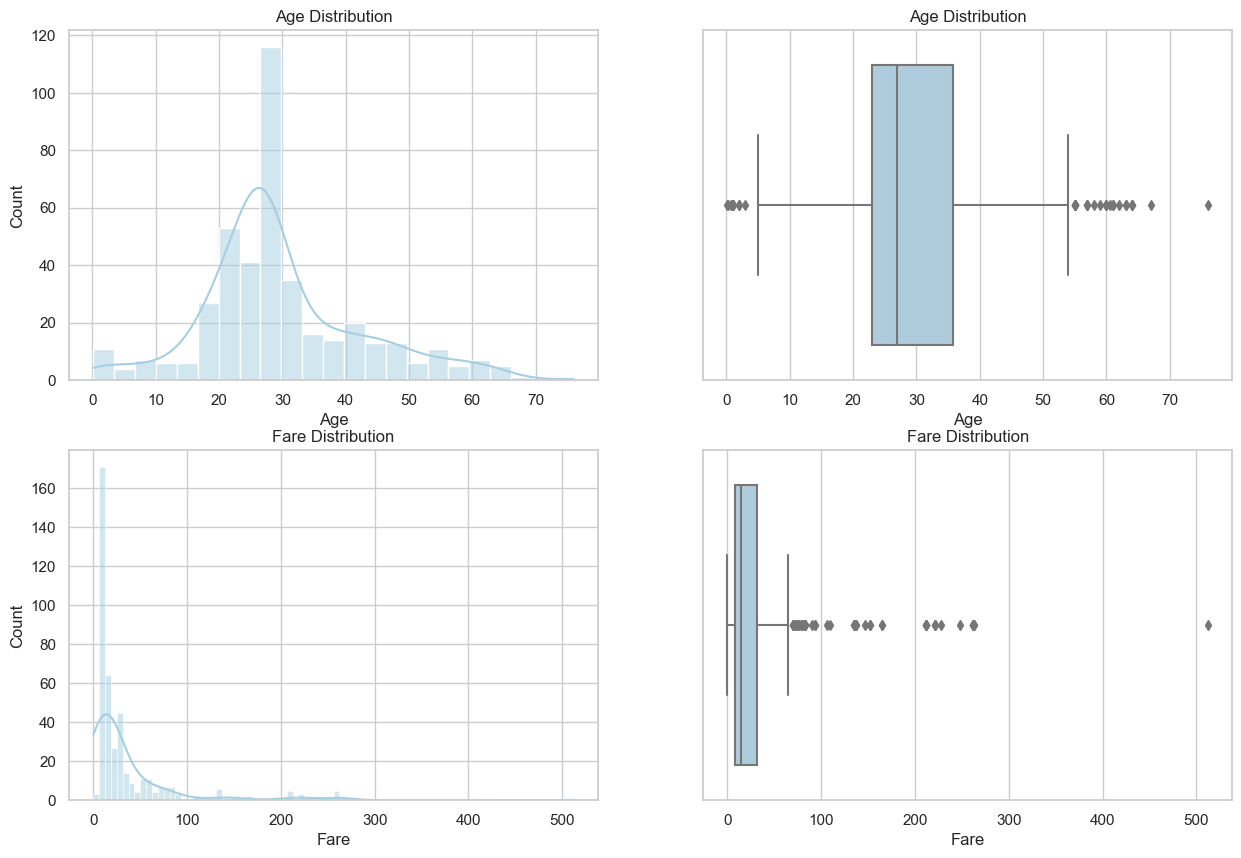

In [153]:
# Create fig and ax objects for plotting (test dataframe) for the numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot a histogram of the 'age' column
sns.histplot(data=df1_test, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot a boxplot of the 'age' column
sns.boxplot(data=df1_test, x='age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# Plot a histogram of the 'fare' column
sns.histplot(data=df1_test, x='fare', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution')
axes[1, 0].set_xlabel('Fare')
axes[1, 0].set_ylabel('Count')

# Plot a boxplot of the 'fare' column
sns.boxplot(data=df1_test, x='fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')

# Display the plots
plt.show()

`Observations`:
* The age and fare distribution in the test set is nearly identical to the training set.
* The outliers in the test set are also similar to the training set.

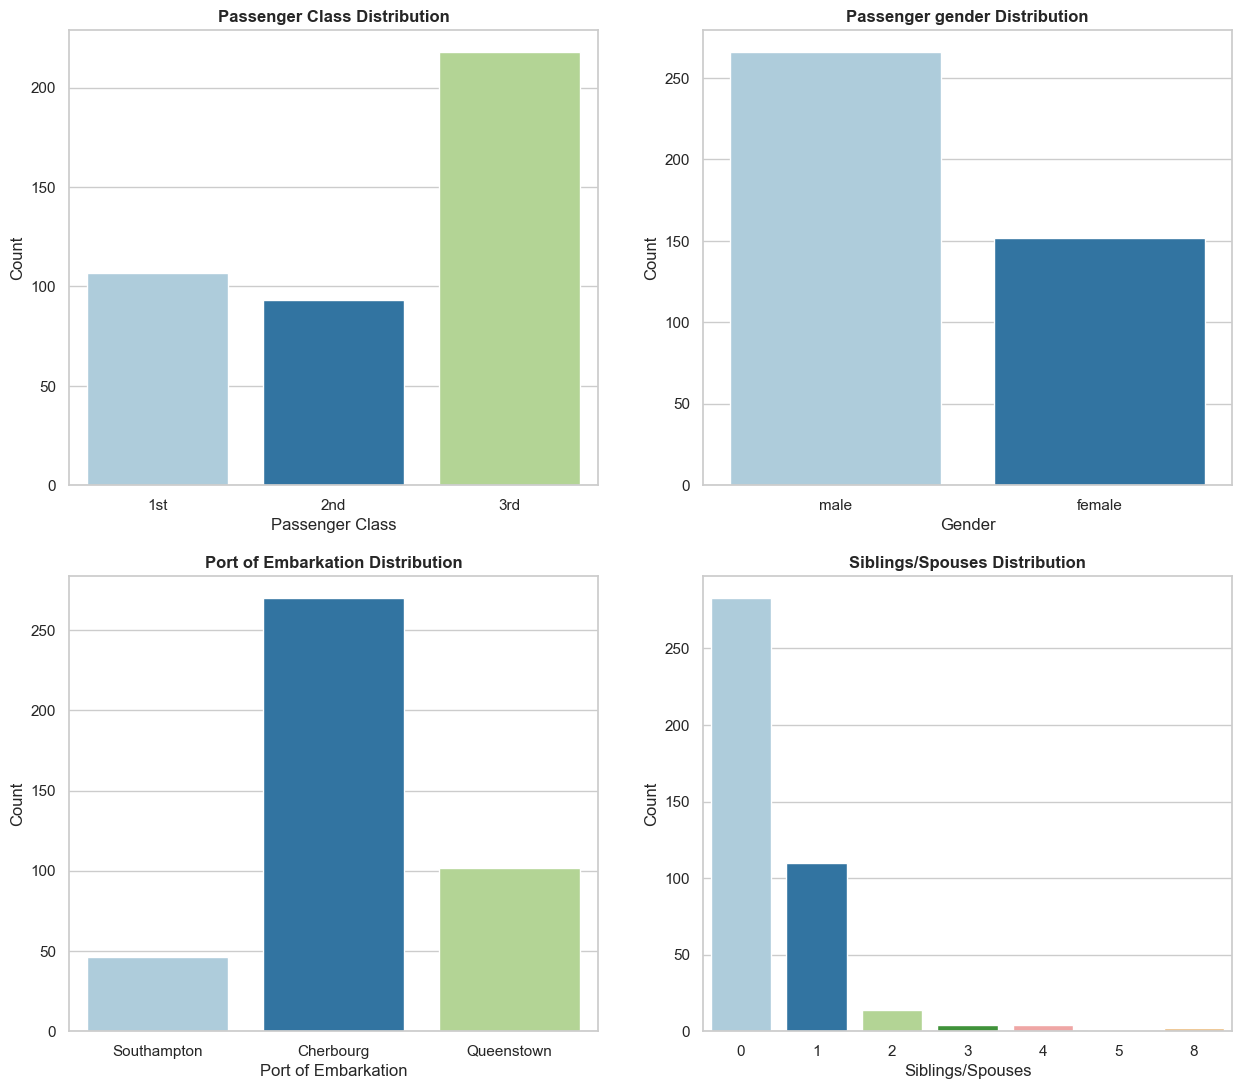

In [154]:
# Explore the rest of the variables in the test dataframe

# Create fig and ax objects for plotting (test dataframe)
fig, axes = plt.subplots(2, 2, figsize=(15, 13))

# Create a count plot of the 't_class' column
sns.countplot(data=df1_test, x='t_class', ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['1st', '2nd', '3rd'])

# Create a count plot of the 'sex' column
sns.countplot(data=df1_test, x='sex', ax=axes[0, 1])
axes[0,1].set_title('Passenger gender Distribution', fontweight='bold')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')

# Create a count plot of the 'embarked' column
sns.countplot(data=df1_test, x='embarked', ax=axes[1, 0])
axes[1, 0].set_title('Port of Embarkation Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Port of Embarkation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Create a count plot of the 'sib_sp' column
sns.countplot(data=df1_test, x='sib_sp', ax=axes[1, 1])
axes[1, 1].set_title('Siblings/Spouses Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Siblings/Spouses')
axes[1, 1].set_ylabel('Count')

# Display the plots
plt.show()

In [155]:
# Compute 't_class' count in the test set
t_class_count = df1_test['t_class'].value_counts()

# Compare 't_class' count in the train and test sets
df2_train['t_class'].value_counts() / t_class_count

# Display the percentage difference between the train and test sets
print('Percentage difference between train and test sets: ', (df2_train['t_class'].value_counts() / t_class_count - 1) * 100)

Percentage difference between train and test sets:  t_class
3    125.229358
1    101.869159
2     97.849462
Name: count, dtype: float64


`Observations`:
* The count for the variables 't_class', 'sex', 'embarked' and 'siblings_spouses' are approximately 50% of the training set.
* Embarking port 'Cherboug' is more common in the test set than in the training set, a ratio difference of 0.05.

## Pace : Analyze Stage

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

In this part of the project, I visualize relationships between variables in the data.

In [156]:
# Display train dataframe 
df2_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked
0,1,0,3,male,22.0,1,0,7.25,S
1,2,1,1,female,38.0,1,0,71.28,C
2,3,1,3,female,26.0,0,0,7.92,S
3,4,1,1,female,35.0,1,0,53.10,S
4,5,0,3,male,35.0,0,0,8.05,S


`Note` : Creating a correlation heatmap for the test data without the target variable is a useful exploratory step to understand feature relationships within the test set. However, for model building and feature selection, it's essential to analyze feature-target correlations and model performance using the training data, where the target variable is available.

I will start by encoding the categorical variables into numerical variables before creating the correlation heatmap:

In [157]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for the 'sex' column
label_encoder = LabelEncoder()

# Apply label encoding to the 'sex' column
df2_train['sex'] = label_encoder.fit_transform(df2_train['sex'])

In [158]:
# Create a label encoder for the 'embarked' column
label_encoder = LabelEncoder()

# Apply label encoding to the 'embarked' column
df2_train['embarked'] = label_encoder.fit_transform(df2_train['embarked'])

In [159]:
# Display the train dataframe
df2_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked
0,1,0,3,1,22.0,1,0,7.25,2
1,2,1,1,0,38.0,1,0,71.28,0
2,3,1,3,0,26.0,0,0,7.92,2
3,4,1,1,0,35.0,1,0,53.10,2
4,5,0,3,1,35.0,0,0,8.05,2


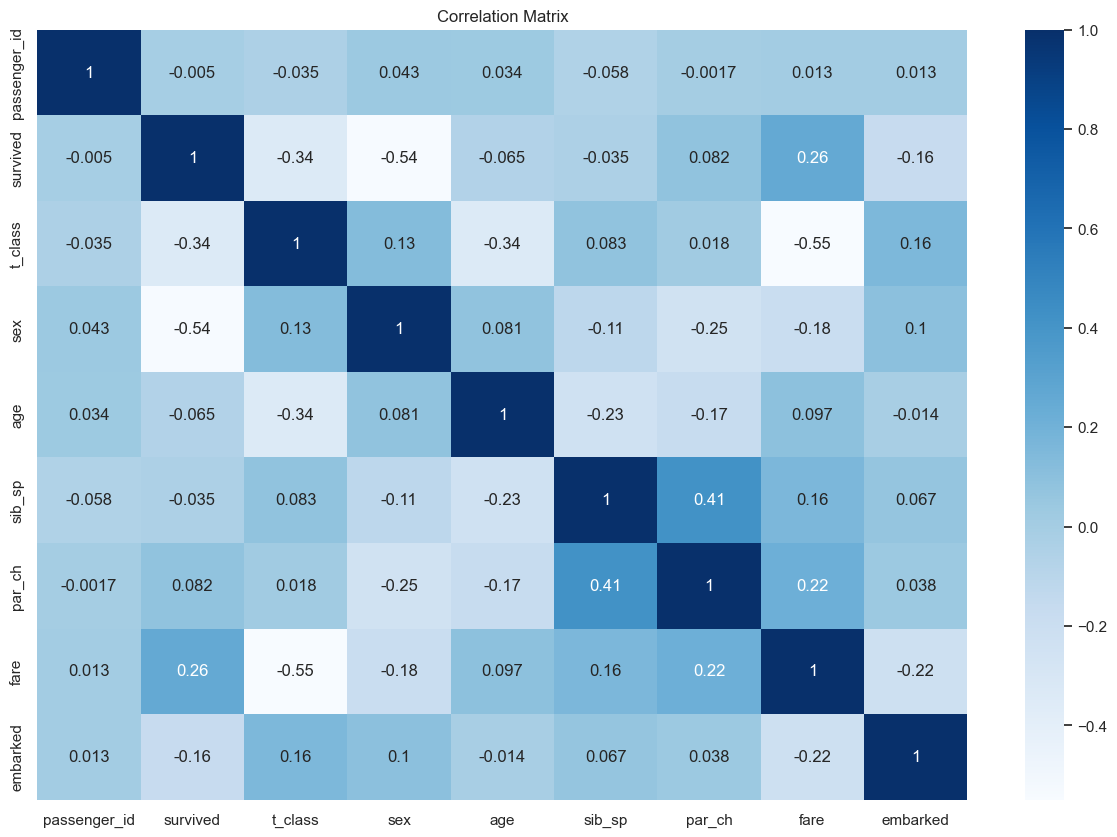

In [160]:
# Create a correlation matrix for the train dataframe
corr_matrix = df2_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

`Observations`:
A positive correlation of 0.26 between the fare and the survival rate, which means that the higher the fare, the higher the survival rate. This is probably due to the fact that the higher the fare, the higher the ticket class, and the higher the ticket class, the higher the survival rate.

On the opposing end, there is a negative correlation of -0.55 between the ticket class and the survival rate, which means that the lower the ticket class, the higher the survival rate.

Time to visualize the data:

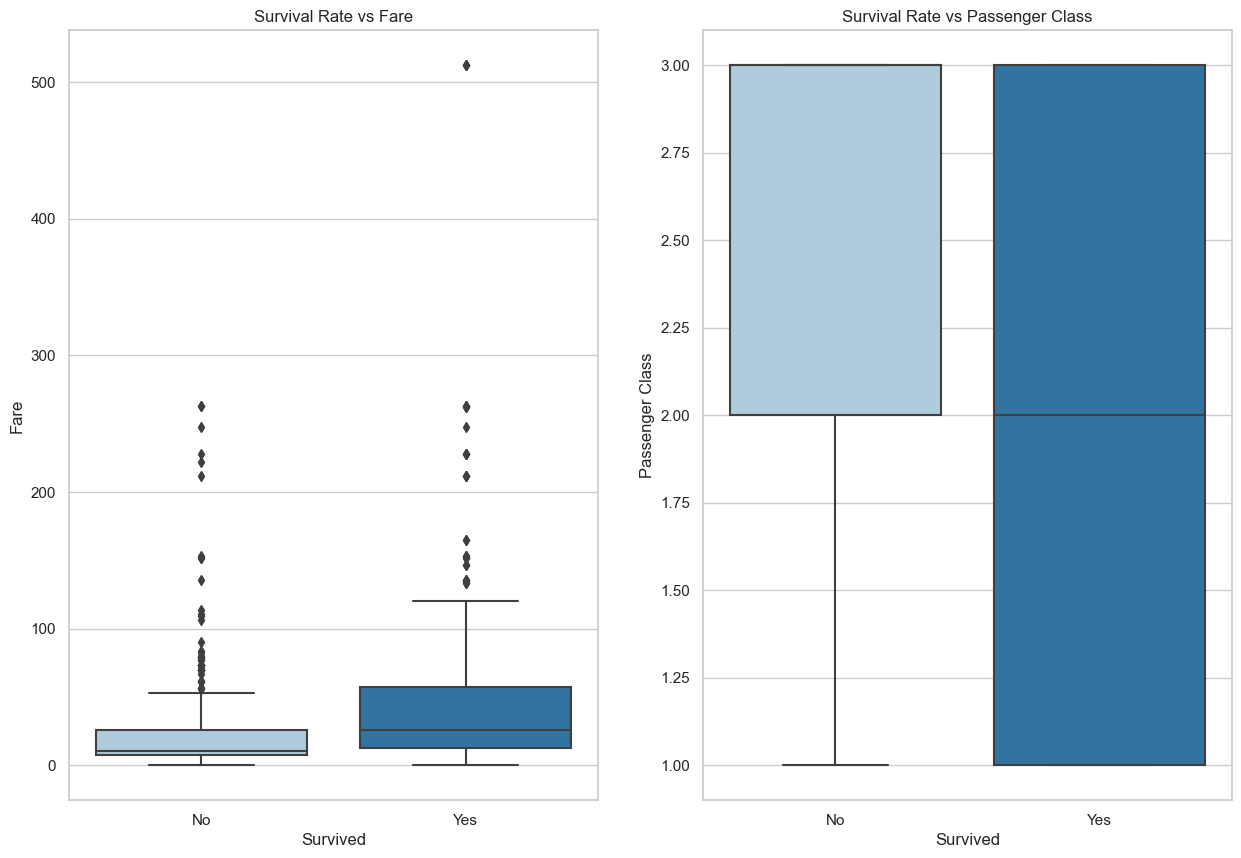

In [161]:
# create separate box plots to compare the fare and ticket class distributions for survivors and non-survivors
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Create a box plot of the 'fare' column
sns.boxplot(data=df2_train, x='survived', y='fare', ax=axes[0])
axes[0].set_title('Survival Rate vs Fare')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Fare')
axes[0].set_xticklabels(['No', 'Yes'])

# Create a box plot of the 't_class' column
sns.boxplot(data=df2_train, x='survived', y='t_class', ax=axes[1])
axes[1].set_title('Survival Rate vs Passenger Class')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Passenger Class')
axes[1].set_xticklabels(['No', 'Yes'])

# Display the plots
plt.show()

`Observations`:
* The boxplot above confirms that the higher the fare, the higher the survival rate.
* The survival rate of passengers with a ticket class of 1 is significantly higher than the other classes.

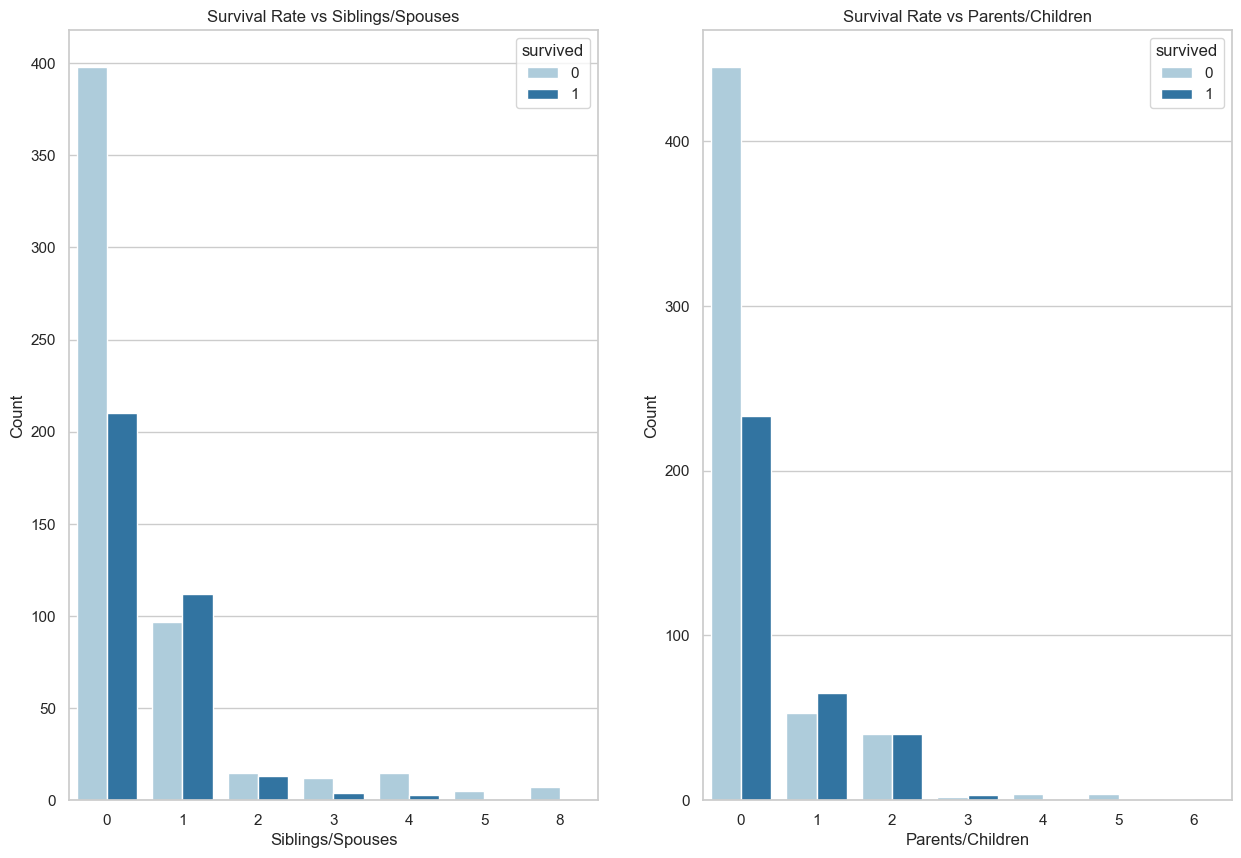

In [162]:
# Create grouped bar plots for 'Sib_Sp' and 'Par_Ch' columns to compare the survival rates for each category
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Create a grouped bar plot of the 'sib_sp' column
sns.countplot(data=df2_train, x='sib_sp', hue='survived', ax=axes[0])
axes[0].set_title('Survival Rate vs Siblings/Spouses')
axes[0].set_xlabel('Siblings/Spouses')
axes[0].set_ylabel('Count')

# Create a grouped bar plot of the 'par_ch' column
sns.countplot(data=df2_train, x='par_ch', hue='survived', ax=axes[1])
axes[1].set_title('Survival Rate vs Parents/Children')
axes[1].set_xlabel('Parents/Children')
axes[1].set_ylabel('Count')

# Display the plots
plt.show()

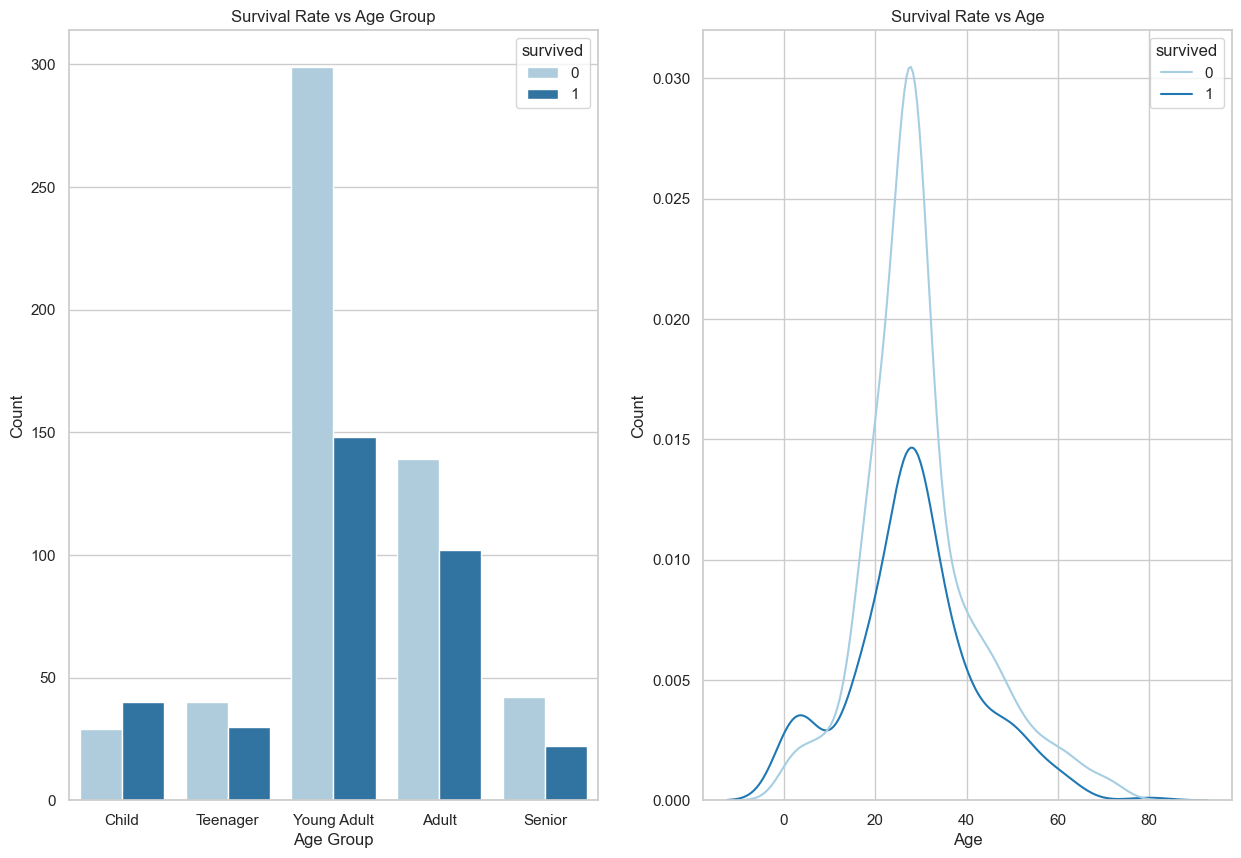

In [163]:
# Create a groupings for the 'age' column as ranges
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df2_train['age_group'] = pd.cut(df2_train['age'], bins=age_bins, labels=age_labels)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Create a grouped bar plot to compare the survival rates for each age group
sns.countplot(data=df2_train, x='age_group', hue='survived', ax=axes[0])
axes[0].set_title('Survival Rate vs Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Create a KDE plot to compare the survival rates for each age group
sns.kdeplot(data=df2_train, x='age', hue='survived', ax=axes[1])
axes[1].set_title('Survival Rate vs Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Display the plot
plt.show()

`Observations`:
It is clear that 'age' is not a good predictor of survival rate based on the previous correlations, as the age distribution is mostly similar for both survived and not survived passengers, but I will keep it for feature engineering as it can capture non-linear relationships between the features and the target variable.

## Insights ##
Up to this stage, it appears that the survival rate is higher for passengers with a higher ticket class, a higher fare, and a younger age. 

`Observations`:
* The higher the number of siblings/spouses or Parents/Children, the lower the survival rate.

## Pace: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data

### Modeling Approach : Tree-based model

This approach covers implementation of Decision tree and Random Forest.

Before splitting the data into training and validation sets, I will encode the categorical variables into numerical variables using one-hot encoding.

In [164]:
# Copy the train dataframe
df3_train = df2_train.copy()

# Encode the 'age_group' column using hot encoding
df3_train = pd.get_dummies(df3_train, columns=['age_group'])

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False


Isolate the target variable from the training data.

In [165]:
# Isolate the 'survived' column in the train dataframe
y = df3_train['survived']

# Display the first five rows of the train labels
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Select the features to be used for training the model.

In [166]:
# Select the features to be used for training and testing
X = df3_train.drop(['survived'], axis=1)

# Display the first five rows of the train features
X.head()

,passenger_id,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior
0,1,3,1,22.0,1,0,7.25,2,False,False,True,False,False
1,2,1,0,38.0,1,0,71.28,0,False,False,False,True,False
2,3,3,0,26.0,0,0,7.92,2,False,False,True,False,False
3,4,1,0,35.0,1,0,53.10,2,False,False,False,True,False
4,5,3,1,35.0,0,0,8.05,2,False,False,False,True,False


In [167]:
# Display the test dataframe
df1_test.head()

,passenger_id,t_class,sex,age,sib_sp,par_ch,fare,embarked
0,892,3,male,34.5,0,0,7.83,Q
1,893,3,female,47.0,1,0,7.00,S
2,894,2,male,62.0,0,0,9.69,Q
3,895,3,male,27.0,0,0,8.66,S
4,896,3,female,22.0,1,1,12.29,S


In [168]:
# Create a copy of the test dataframe
df2_test = df1_test.copy()

# Create a label encoder for the 'sex' column
label_encoder = LabelEncoder()

# Apply label encoding to the 'sex' column in the test dataframe
df2_test['sex'] = label_encoder.fit_transform(df2_test['sex'])

# Apply label encoding to the 'embarked' column in the test dataframe
df2_test['embarked'] = label_encoder.fit_transform(df2_test['embarked'])

# Create a groupings for the 'age' column as ranges
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df2_test['age_group'] = pd.cut(df2_test['age'], bins=age_bins, labels=age_labels)

# Encode the 'age_group' column using hot encoding
df2_test = pd.get_dummies(df2_test, columns=['age_group'])

# Display the first five rows of the updated dataframe
df2_test.head()

,passenger_id,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior
0,892,3,1,34.5,0,0,7.83,1,False,False,False,True,False
1,893,3,0,47.0,1,0,7.00,2,False,False,False,True,False
2,894,2,1,62.0,0,0,9.69,1,False,False,False,False,True
3,895,3,1,27.0,0,0,8.66,2,False,False,True,False,False
4,896,3,0,22.0,1,1,12.29,2,False,False,True,False,False


In [169]:
# Compare column names between the train and test dataframes
print('Train columns:', X.columns)
print('Test columns:', df2_test.columns)

Train columns: Index(['passenger_id', 't_class', 'sex', 'age', 'sib_sp', 'par_ch', 'fare',
       'embarked', 'age_group_Child', 'age_group_Teenager',
       'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')
Test columns: Index(['passenger_id', 't_class', 'sex', 'age', 'sib_sp', 'par_ch', 'fare',
       'embarked', 'age_group_Child', 'age_group_Teenager',
       'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')


I already have a test set, so I will not split the training data into training and validation sets. I will use the entire training data to train the model, and then I will use the test set to evaluate the model.

#### Decision tree - Round 1

Constructing a decision tree model and set up cross-validated grid search to find the best model parameters.

In [170]:
# Instentiate a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to 'params_dt'
params_dt = {'max_depth': [3, 4, 5, None],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4, 0.6, 0.8]}

# Assign a dictionary of scoring metrics to 'scoring'
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a 4 cv fold grid search
tree1 = GridSearchCV(estimator=tree_clf, param_grid=params_dt, scoring=scoring, cv=4, refit='accuracy')

Fit the decision tree model to the training data.

In [171]:
%%time
tree1.fit(X, y)

CPU times: total: 1.78 s
Wall time: 4.29 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, None],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             refit='accuracy',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

Identify the best model parameters.

In [172]:
# Check the best hyperparameters
print('Best hyperparameters:\n', tree1.best_params_)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.06}


Identify the best AUC score achieved by the decision tree model on the training data.

In [173]:
# check the best AUC score on CV
print('Best AUC score:\n', tree1.best_score_)

Best AUC score:
 0.8047105401365491


`Note` : 0.80 is a good AUC score, it means that the model can predict the survival rate of a passenger correctly 80% of the time.

Next, I will write a function to extract all the scores from the grid search.

In [174]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function to extract all the scores from the grid search.

In [175]:
# Extract all CV scores
tree1.cv_results = make_results('decision tree cv', tree1, 'auc')
tree1.cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.829877,0.601778,0.685099,0.793475,0.853197


`Observations`:
The decision tree model achieves good precision, accuracy, and AUC, indicating it correctly identifies survivors with a high degree of confidence. However, its recall is somewhat lower, meaning it may miss some survivors. The F1 score balances precision and recall. Overall, the model shows promise but could be further optimized to improve recall.

#### Random forest - Round 1

Constructing a random forest model and set up cross-validated grid search to find the best model parameters.

In [176]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_rf`
params_rf = {'max_depth': [3, 5, None],
            'n_estimators': [300, 500],
            'max_features': [1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            }

# Assign a dictionary of scoring metrics to `capture`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a grid search
rf1 = GridSearchCV(estimator=rf,
                    param_grid=params_rf,
                    scoring=scoring,
                    refit='roc_auc',
                    cv=4,
                    n_jobs=-1)

fit the random forest model to the training dataset.

In [177]:
%%time
rf1.fit(X, y)

CPU times: total: 2.34 s
Wall time: 2min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

Specify path to where the model will be saved.

In [178]:
# Define a path to save the model
model_path = r"C:\Users\spectre\Downloads\Titanic predictive model project\rf1.pkl"

Define functions to pickle and unpickle the model.

In [179]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [180]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the function defined above to save the model in a pickle file.

In [181]:
# Write pickle
write_pickle(model_path, rf1, 'titan_rf1')

In [182]:
# read pickle
rf1 = read_pickle(model_path, 'titan_rf1')

Identify the optimal AUC score achieved by the random forest model on the training data.

In [183]:
# check best AUC score on CV
print('Best AUC score:\n', rf1.best_score_)

Best AUC score:
 0.8643926272582202


Identify the best values for the model parameters.

In [184]:
# check the best hyperparameters
print('Best hyperparameters:\n', rf1.best_params_)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


Collect the evaluation scores on the training data for the decision tree and random forest models.

In [185]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Next, use the best performing model to make predictions on the test data.

In [186]:
# Get predictions for the test set
rf1.test_results = get_scores('random forest', rf1, X, y)
rf1.test_results

,model,precision,recall,f1,accuracy,AUC
0,random forest,0.819398,0.716374,0.764431,0.830527,0.809007


`Observations`: 
The random forest model performs slightly better than the decision tree model across most evaluation metrics.
* Random forest model achieves a higher recall, indicating better performance in correctly identifying positive cases (survivors).
* RF also has a higher F1 score, indicating a better balance between precision and recall.
* Decision tree model has a higher AUC score, which measures the model's ability to distinguish between positive and negative classes (survivors and non-survivors) based on the ROC curve.

<br> In general, `Random Forest` appears to be the more robust and accurate model in this comparison.

#### Feature Engineering

Reading the evaluation scores, there is a chance that the model is underfitting the data, so I will try to improve the model by creating new features.

The first round of decision tree and random forest models included only the original features in the dataset. Now I will add new features to the dataset and see if the model performance improves.

In [187]:
# display the training dataframe columns
df3_train.columns

Index(['passenger_id', 'survived', 't_class', 'sex', 'age', 'sib_sp', 'par_ch',
       'fare', 'embarked', 'age_group_Child', 'age_group_Teenager',
       'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')

##### Feature 1: Family size
Create a feature that represents family size by adding 'sib_sp' and 'par_ch' or by counting the total number of family members on board.

In [188]:
# Create a new feature 'family_size' in the train dataframe
df3_train['family_size'] = df3_train['sib_sp'] + df3_train['par_ch'] + 1

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,family_size
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False,2
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False,2
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False,1
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False,2
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False,1


##### Feature 2: Fare bin
Create a feature that represents the fare bin by dividing the fare into 4 bins.

In [189]:
# Create a new feature 'fare bin' in the train dataframe
df3_train['fare_bin'] = pd.qcut(df3_train['fare'], q=4, labels=['low', 'medium', 'high', 'very high'])

# Apply label encoding to the 'fare_bin' column in the train dataframe
df3_train['fare_bin'] = label_encoder.fit_transform(df3_train['fare_bin'])

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,family_size,fare_bin
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False,2,1
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False,2,3
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False,1,2
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False,2,3
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False,1,2


##### Feature 3: Polynomial features
Create polynomial features by multiplying the age and fare features by themselves.

In [190]:
# Create an interaction feature to multiply 'fare' by 'age'
df3_train['fare_age'] = df3_train['fare'] * df3_train['age']

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,family_size,fare_bin,fare_age
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False,2,1,159.50
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False,2,3,2708.64
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False,1,2,205.92
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False,2,3,1858.50
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False,1,2,281.75


##### Feature 4: Squared features

Create another polynomial feature to include squared age and fare features to capture curvilinear relationships.

In [194]:
# Create a new feature squared age in the train dataframe
df3_train['age_sq'] = df3_train['age'] ** 2

# Create a new feature squared fare in the train dataframe
df3_train['fare_sq'] = df3_train['fare'] ** 2

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,family_size,fare_bin,fare_age,age_sq,fare_sq
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False,2,1,159.50,484.0,52.5625
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False,2,3,2708.64,1444.0,5080.8384
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False,1,2,205.92,676.0,62.7264
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False,2,3,1858.50,1225.0,2819.6100
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False,1,2,281.75,1225.0,64.8025


##### Feature 5: Age-Gender Interaction
Create another interaction feature of 'age' and 'sex' to capture different age-gender groups and their impact on survival.

In [205]:
# Define a dictionary to map age and sex combinations to categories
age_sex_categories = {
    ('young', 'female'): 'young female',
    ('young', 'male'): 'young male',
    ('adult', 'female'): 'adult female',
    ('adult', 'male'): 'adult male',
    ('middle-aged', 'female'): 'middle-aged female',
    ('middle-aged', 'male'): 'middle-aged male',
    ('senior', 'female'): 'senior female',
    ('senior', 'male'): 'senior male',
    ('old', 'female'): 'old female',
    ('old', 'male'): 'old male'
}

##### Feature 6: Passenger class gender interaction
Create a feature that represents combinations of gender and passenger class.

In [213]:
# Define a dictionary to map age and sex combinations to categories
age_sex_categories = {
    ('young', 'female'): 'young female',
    ('young', 'male'): 'young male',
    ('adult', 'female'): 'adult female',
    ('adult', 'male'): 'adult male',
    ('middle-aged', 'female'): 'middle-aged female',
    ('middle-aged', 'male'): 'middle-aged male',
    ('senior', 'female'): 'senior female',
    ('senior', 'male'): 'senior male',
    ('old', 'female'): 'old female',
    ('old', 'male'): 'old male'
}

# Initialize an empty list to store 'age-gender' values
age_gender_values = []

# Loop through each row and apply the mapping
for index, row in df3_train.iterrows():
    age_gender = age_sex_categories.get((row['age'], row['sex']), row['age'])
    age_gender_values.append(age_gender)

# Create the 'age-gender' column in the DataFrame
df3_train['age-gender'] = age_gender_values

# Apply label encoding to the 'age-gender' column
le = LabelEncoder()
df3_train['age-gender'] = le.fit_transform(df3_train['age-gender'])

# Display the first five rows of the updated dataframe
df3_train.head()

,passenger_id,survived,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,family_size,fare_bin,fare_age,age_sq,fare_sq,age-gender
0,1,0,3,1,22.0,1,0,7.25,2,False,False,True,False,False,2,1,159.50,484.0,52.5625,21
1,2,1,1,0,38.0,1,0,71.28,0,False,False,False,True,False,2,3,2708.64,1444.0,5080.8384,45
2,3,1,3,0,26.0,0,0,7.92,2,False,False,True,False,False,1,2,205.92,676.0,62.7264,27
3,4,1,1,0,35.0,1,0,53.10,2,False,False,False,True,False,2,3,1858.50,1225.0,2819.6100,41
4,5,0,3,1,35.0,0,0,8.05,2,False,False,False,True,False,1,2,281.75,1225.0,64.8025,41


##### Recursive Feature Elimination (RFE)

Time to use RFE to select the best features for the model.

In [214]:
from sklearn.feature_selection import RFE

# Apply Recursive Feature Elimination (RFE) to identify the most important features for the train dataframe
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X, y)

# Create a dataframe of the features and their respective ranks
feature_ranks = pd.DataFrame({'feature': X.columns, 'rank': rfe.ranking_})

# Sort the dataframe by rank
feature_ranks = feature_ranks.sort_values('rank')

# Display the top 10 features
feature_ranks.head(10)

,feature,rank
0,passenger_id,1
1,t_class,1
2,sex,1
3,age,1
4,sib_sp,1
5,par_ch,1
6,fare,1
7,embarked,1
8,age_group_Child,1
11,age_group_Adult,1


In [215]:
# Define the list of top features ranked as 1
top_features = [
    'passenger_id', 't_class', 'sex', 'age', 'sib_sp', 'par_ch', 'fare', 'embarked',
    'age_group_Child', 'age_group_Adult'
]

# Drop the features not in the top_features list
df3_train = df3_train.drop(df3_train.columns.difference(top_features), axis=1)

# Display the first few rows of the updated dataframe
df3_train.head()

,passenger_id,t_class,sex,age,sib_sp,par_ch,fare,embarked,age_group_Child,age_group_Adult
0,1,3,1,22.0,1,0,7.25,2,False,False
1,2,1,0,38.0,1,0,71.28,0,False,True
2,3,3,0,26.0,0,0,7.92,2,False,False
3,4,1,0,35.0,1,0,53.10,2,False,True
4,5,3,1,35.0,0,0,8.05,2,False,True


#### Decision tree - Round 2

In [216]:
# Instantiate model
tree2 = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to `params_dt` with the updated features and best hyperparameters:{'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.06}
params_dt = {'max_depth': [3],
                'min_samples_leaf': [0.06],
                'max_features': [0.6]}

# Assign a dictionary of scoring metrics to `scoring`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a 4 cv fold grid search
tree2 = GridSearchCV(estimator=tree2, param_grid=params_dt, scoring=scoring, cv=4, refit='accuracy')

In [217]:
%%time
tree2.fit(X, y)

CPU times: total: 15.6 ms
Wall time: 144 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3], 'max_features': [0.6],
                         'min_samples_leaf': [0.06]},
             refit='accuracy',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

In [218]:
# check the best AUC score on CV
print('Best AUC score:\n', tree2.best_score_)

Best AUC score:
 0.8047105401365491


The AUC score of the second decision tree model has dropped to 0.80.

Next, check the rest of the evaluation scores.

In [219]:
# Get all CV scores from tree2
tree2.cv_results = make_results('decision tree cv', tree2, 'auc')
print(tree1.cv_results)
print(tree2.cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.829877  0.601778  0.685099  0.793475  0.853197
              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.862855  0.587688  0.696645  0.804711  0.833136


`Observations`:
By only focusing on the top 10 features indicated by the RFE, the model's precision, accuracy, and F1 score have improved, but its recall has dropped.
<br> The second decision tree model has a higher precision, accuracy, and F1 score than the first model, but it has a lower recall.
Which is to be expected given fewer features are used in the second model, however, the second model is more robust and accurate than the first model.

#### Random forest - Round 2

In [220]:
# Instantiate model
rf2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_rf` with the updated features and best hyperparameters:{'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
params_rf = {'max_depth': [3],
            'n_estimators': [500],
            'max_features': [1.0],
            'min_samples_leaf': [3],
            'min_samples_split': [2],
            }

# Assign a dictionary of scoring metrics to `scoring`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a grid search
rf2 = GridSearchCV(estimator=rf2,
                    param_grid=params_rf,
                    scoring=scoring,
                    refit='roc_auc',
                    cv=4,
                    n_jobs=-1)

In [221]:
%%time
rf2.fit(X, y)

CPU times: total: 672 ms
Wall time: 9.43 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [1.0],
                         'min_samples_leaf': [3], 'min_samples_split': [2],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

In [222]:
# Write pickle
write_pickle(model_path, rf2, 'titan_rf2')

In [223]:
# read pickle
rf2 = read_pickle(model_path, 'titan_rf2')

In [224]:
# Check best parameters
print('Best hyperparameters:\n', rf2.best_params_)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [225]:
# Check best AUC score on CV
print('Best AUC score:\n', rf2.best_score_)

Best AUC score:
 0.8643926272582202


In [229]:
# Get predictions for the test set
rf2.test_results = get_scores('random forest', rf2, X, y)
rf2.test_results

,model,precision,recall,f1,accuracy,AUC
0,random forest,0.819398,0.716374,0.764431,0.830527,0.809007


Next, I plot a confusion matrix to visualize the predictive performance of the model on the test set.

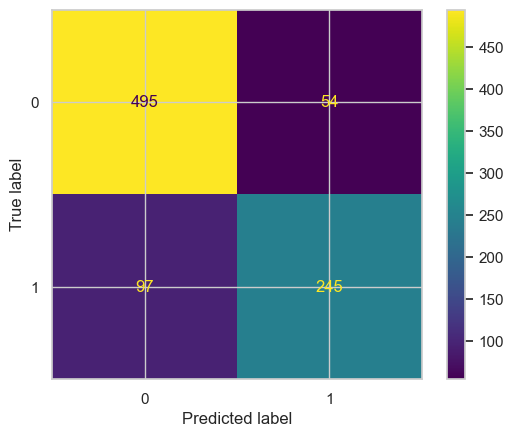

In [235]:
# Generate array values for confusion matrix
y_pred = rf2.best_estimator_.predict(X)
rf_cm = confusion_matrix(y, y_pred)

# Create display for the confusion matrix
rf_disp = ConfusionMatrixDisplay(rf_cm, display_labels=rf2.best_estimator_.classes_)
rf_disp.plot()
plt.show()

`Observations`:
The model correctly predicted 495 passengers who survived and 245 passengers who did not survive, but it also predicted 54 passengers who survived but in reality did not survive, and 97 passengers who did not survive but actually survived.

For exploratory purposes, I will inspect the splits of the decision tree model and the feature importances of the random forest model.

#### Decision tree splits

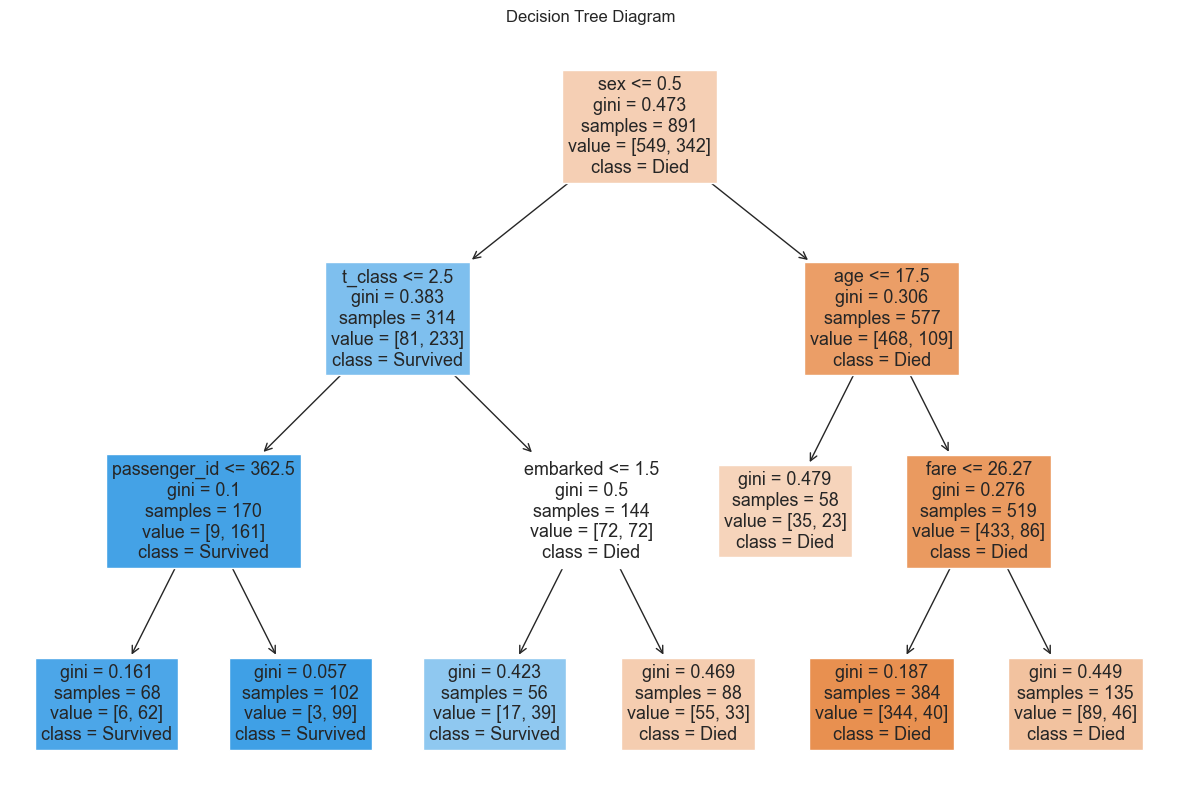

In [236]:
# Plot the tree diagram for the decision tree model
plt.figure(figsize=(15, 10))
plot_tree(tree2.best_estimator_, max_depth=6, feature_names=X.columns, class_names={0:'Died', 1:'Survived'} ,filled=True)
plt.title('Decision Tree Diagram')
plt.show()

In [237]:
# Create a dataframe of feature importances for the decision tree model
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': tree2.best_estimator_.feature_importances_})

# Sort values by importance in descending order, filter importances < 0
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).query('Importance > 0')

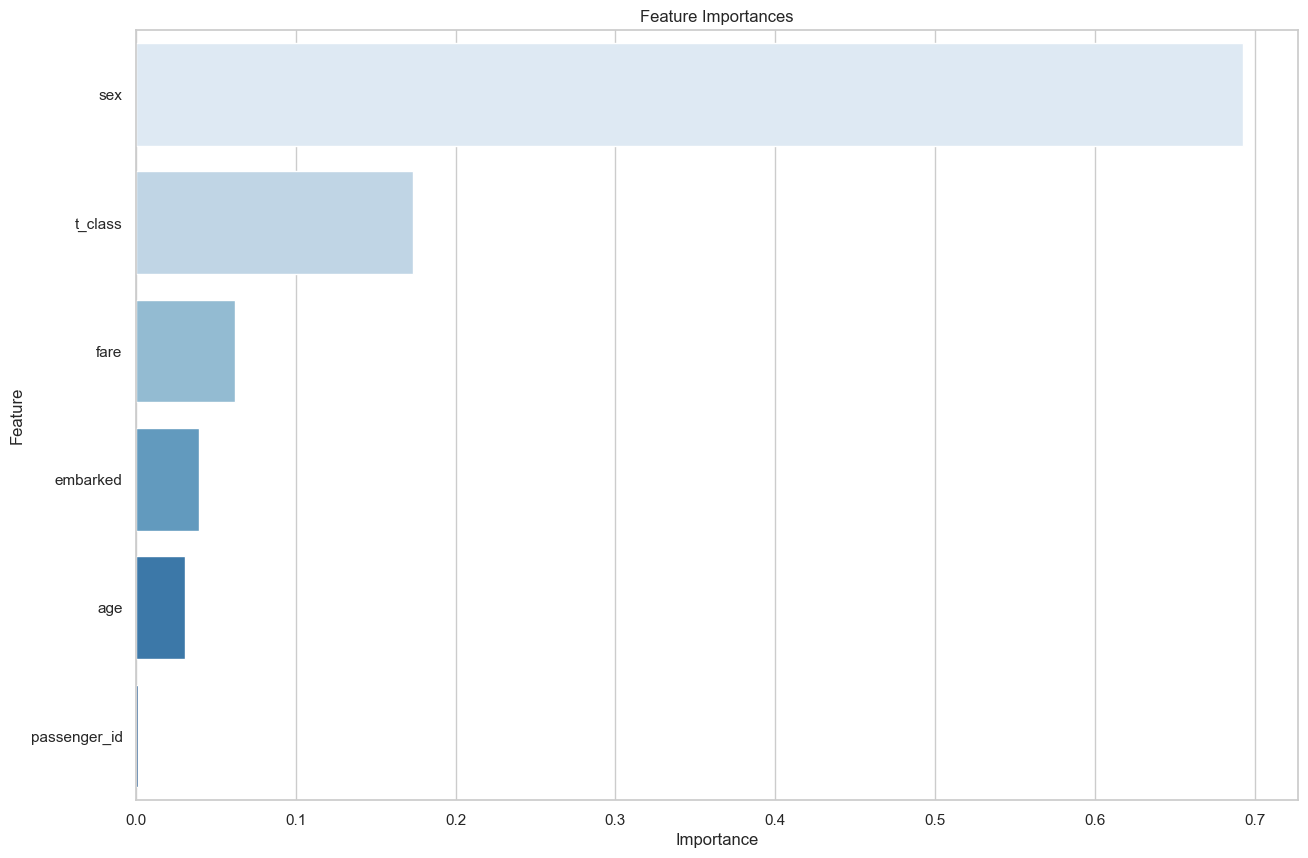

In [238]:
# Create a visual of the decision tree feature importances.
plt.figure(figsize=(15, 10))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='Blues')
plt.title('Feature Importances')
plt.show()

Unexpectedly, the decision tree model splits the data based on the `sex` variable first, and then the `ticket_class` variable. This is unexpected because the `fare` variable has a higher correlation with the target variable than the `sex` or `ticket_class` variables.

#### Random forest feature importance

Now, plot the feature importance for the random forest model.

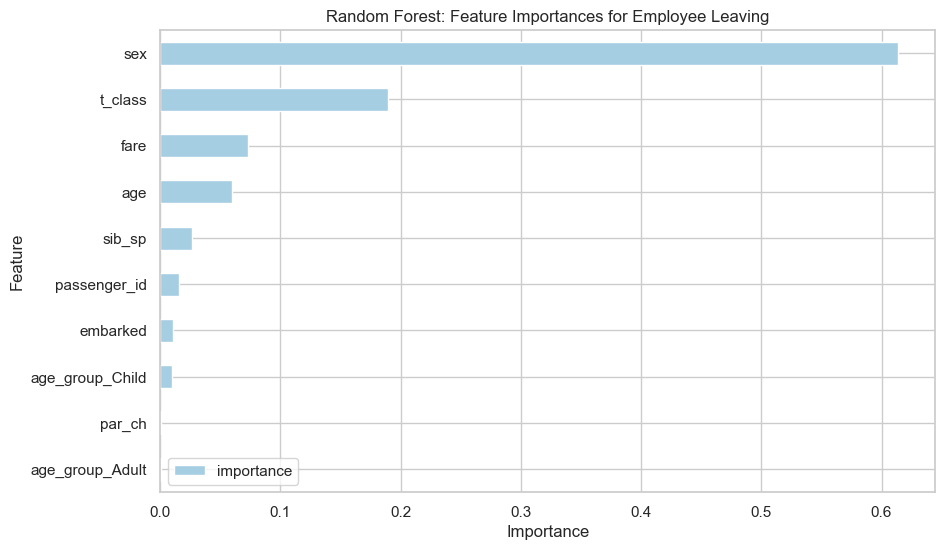

In [240]:
# Get feature importances for the random forest model
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf2.best_estimator_.feature_importances_})

# Get indices of top 10 features
rf2_indices = np.argsort(rf2.best_estimator_.feature_importances_)[::-1][:10]

# Get column labels of top 10 features
rf2_feat = X.columns[rf2_indices]

# Filter 'rf2_feat' to consist of only the top 10 features
rf2_importances = rf2.best_estimator_.feature_importances_[rf2_indices]

y_df = pd.DataFrame({'feature': rf2_feat, 'importance': rf2_importances})
y_sort_df = y_df.sort_values('importance', ascending=True)
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', x='feature', y='importance', ax=ax1, color='C0')

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")

plt.show()

`Observations`:
The plot shown above shows that in this random forest model, `sex`, `t_class`, `fare`, and `age` have the highest feature importance, in that order.

<br> These variables are also the ones with the highest correlation with the target variable, These variables are most likely the most important features for predicting passenger survival, which is consistent with the results of the correlation heatmap (except for the 'sex' and 'age' variable).

# Pace: Execute Stage
- Interpret model performance and results
- Share insights with the Kaggle community

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations to share with the Kaggle community

In [247]:
# Display the results of the decision tree model number 2
tree2.cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.862855,0.587688,0.696645,0.804711,0.833136


In [248]:
rf2.test_results

,model,precision,recall,f1,accuracy,AUC
0,random forest,0.819398,0.716374,0.764431,0.830527,0.809007


### Summary of model results

**Tree-based Machine Learning**

The second decision tree model achieved AUC of 83%, precision of 86%, recall of 59%, accuracy of 80%, and F1-score of 70%.
The random forest modestly outperformed the decision tree model in all evaluation metrics but the AUC and precision, which means that it correctly identifies survivors with a high degree of confidence. However, its recall is still low, meaning it may miss some survivors. The F1 score balances precision and recall. Overall, the model shows promise but could be further optimized to improve recall.

### Conclusion
To survive the Titanic, our data-driven journey uncovered some crucial insights. The most influential factors for predicting passenger survival are gender, ticket class, fare, and age. These variables, especially gender and ticket class, played a significant role in determining who made it through that fateful night.

We employed two different models, a decision tree and a random forest, to navigate this sea of data. The random forest edged out the decision tree, performing better in most evaluation metrics. It exhibited high precision, which means it correctly identified survivors with a strong degree of certainty. However, its recall, which measures its ability to catch all survivors, remains somewhat low. This indicates that the model might overlook some passengers who actually survived.

In conclusion, the journey doesn't end here. We can fine-tune our model to improve its recall and overall performance. Much like lifeboats on the Titanic, there's room for optimization to save more lives. By leveraging gender, ticket class, fare, and age along with further model enhancements, we can navigate the data waves and increase our chances of predicting who survived that historic night.

## Submission File Format:
I should submit a csv file with exactly 418 entries plus a header row. my submission will show an error if I have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [249]:
# Load the submission file
submission = pd.read_csv(r"C:\Users\spectre\Downloads\Titanic predictive model project\titanic dataset\gender_submission.csv")

In [251]:
# Predict 'Survived' on the test set
submission['Survived'] = rf2.best_estimator_.predict(df2_test)

# Create submission dataframe to be submitted to Kaggle
submission = submission[['PassengerId', 'Survived']]

# print submission entire dataframe
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [252]:
# save submission to csv
submission.to_csv(r"C:\Users\spectre\Downloads\Titanic predictive model project\titanic dataset\submission.csv", index=False)